In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt            
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
import glob
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

ParserError: ignored

In [ ]:
df = pd.read_csv('combined_csv.csv')

In [ ]:
df.head(n=10)

,Campaign name,Ad set name,Ad name,Objective,Text,Day,Campaign name.1,Impressions,Reach,Result Type,Results,Cost per result,Amount spent (AUD),Frequency,Outbound CTR (click-through rate),Unique outbound clicks,Reporting starts,Reporting ends
0,SIM028 - Simonds FY22 - SA - Acquisition - Lea...,SA - Retargeting,SA - Simonds Range - Facade - Static,LEAD_GENERATION,Start with Simonds 🌟,2021-10-13,SIM028 - Simonds FY22 - SA - Acquisition - Lea...,128,124,NaN,NaN,NaN,2.18,1.032258,NaN,NaN,2021-10-13,2021-10-13
1,SIM028 - Simonds FY22 - Acquisition - Lead Ads...,VIC - Lookalikes (1%) - Sales,Vic - Lookalike - Video 1 - 9th Sept'21,LEAD_GENERATION,🏡First Home Buyers Dream🏡,2021-10-13,SIM028 - Simonds FY22 - Acquisition - Lead Ads...,2,2,NaN,NaN,NaN,0.09,1.000000,NaN,NaN,2021-10-13,2021-10-13
2,SIM028 - Simonds FY22 - NSW - Acquisition - Le...,NSW - Lookalikes,NSW - Simonds Range - Marsden 30 - Static,LEAD_GENERATION,View award winning home designs\n,2021-10-13,SIM028 - Simonds FY22 - NSW - Acquisition - Le...,892,855,On-Facebook leads,1.0,16.38,16.38,1.043275,NaN,NaN,2021-10-13,2021-10-13
3,SIM028 - Simonds FY22 - Awareness - Video Views,National - Block Targeting,National - Simonds Brand - Video v2,VIDEO_VIEWS,Building homes for 70 years,2021-10-13,SIM028 - Simonds FY22 - Awareness - Video Views,484,456,NaN,NaN,NaN,8.70,1.061404,NaN,NaN,2021-10-13,2021-10-13
4,SIM028 - Simonds FY22 - Sales Campaigns - Lead...,QLD - Lookalikes,QLD - Venture - Static,LEAD_GENERATION,Save $22k* on luxury upgrades,2021-10-13,SIM028 - Simonds FY22 - Sales Campaigns - Lead...,25,25,NaN,NaN,NaN,0.58,1.000000,NaN,NaN,2021-10-13,2021-10-13
5,SIM028 - Simonds FY22 - Acquisition - Experian...,Experian - Young Professionals,Experian - Young Professionals - Carousel 1,LEAD_GENERATION,Sick of renting?,2021-10-13,SIM028 - Simonds FY22 - Acquisition - Experian...,121,118,NaN,NaN,NaN,1.46,1.025424,NaN,NaN,2021-10-13,2021-10-13
6,SIM028 - Simonds FY22 - SA - Acquisition - Lea...,SA - Lookalikes,SA - Centro Range - Montebello 27 - Static,LEAD_GENERATION,NEW Montebello 27 - CENTRO by Simonds,2021-10-13,SIM028 - Simonds FY22 - SA - Acquisition - Lea...,244,239,NaN,NaN,NaN,3.49,1.020921,NaN,NaN,2021-10-13,2021-10-13
7,SIM028 - Simonds FY22 - Acquisition - Experian...,Experian - Young Professionals,Experian - Young Professionals - Static 1,LEAD_GENERATION,Sick of renting?,2021-10-13,SIM028 - Simonds FY22 - Acquisition - Experian...,435,406,NaN,NaN,NaN,6.15,1.071429,NaN,NaN,2021-10-13,2021-10-13
8,SIM028 - Simonds FY22 - Acquisition - Experian...,Experian - Young Professionals,Experian - Young Professionals - Carousel 2,LEAD_GENERATION,Tired of your share house?,2021-10-13,SIM028 - Simonds FY22 - Acquisition - Experian...,79,79,NaN,NaN,NaN,1.06,1.000000,NaN,NaN,2021-10-13,2021-10-13
9,SIM028 - Simonds FY22 - Acquisition - Lead Ads...,QLD - Property Interests,QLD - Simonds Range - Armstrong 37 - Animated,LEAD_GENERATION,View award winning home designs,2021-10-13,SIM028 - Simonds FY22 - Acquisition - Lead Ads...,349,332,NaN,NaN,NaN,9.24,1.051205,NaN,NaN,2021-10-13,2021-10-13


In [ ]:
col1= df["Ad set name"].str.split("-",n=1,expand=True)
df["location"]=col1[0]
df["ad set"]=col1[1]
df.drop("Ad set name",axis="columns",inplace=True)


col1= df["Ad name"].str.split("-",n=-1,expand=True)
df["location1"]=col1[0]
df["ad_name"]=col1[1]
df["ad_name1"]=col1[2]
df["ad_name2"]=col1[3]
df.drop("Ad name",axis="columns",inplace=True)

minor_columns = ["Campaign name","Campaign name.1", "Outbound CTR (click-through rate)", "Unique outbound clicks","location1","Reporting starts","Reporting ends"]
df.drop(minor_columns,axis="columns",inplace=True)


df.head()

,Objective,Text,Day,Impressions,Reach,Result Type,Results,Cost per result,Amount spent (AUD),Frequency,location,ad set,ad_name,ad_name1,ad_name2
0,LEAD_GENERATION,Start with Simonds 🌟,2021-10-13,128,124,NaN,NaN,NaN,2.18,1.032258,SA,Retargeting,Simonds Range,Facade,Static
1,LEAD_GENERATION,🏡First Home Buyers Dream🏡,2021-10-13,2,2,NaN,NaN,NaN,0.09,1.000000,VIC,Lookalikes (1%) - Sales,Lookalike,Video 1,9th Sept'21
2,LEAD_GENERATION,View award winning home designs\n,2021-10-13,892,855,On-Facebook leads,1.0,16.38,16.38,1.043275,NSW,Lookalikes,Simonds Range,Marsden 30,Static
3,VIDEO_VIEWS,Building homes for 70 years,2021-10-13,484,456,NaN,NaN,NaN,8.70,1.061404,National,Block Targeting,Simonds Brand,Video v2,None
4,LEAD_GENERATION,Save $22k* on luxury upgrades,2021-10-13,25,25,NaN,NaN,NaN,0.58,1.000000,QLD,Lookalikes,Venture,Static,None


In [ ]:
df.corr()

,Impressions,Reach,Results,Cost per result,Amount spent (AUD),Frequency
Impressions,1.000000,0.996470,0.667568,0.438241,0.952148,0.378079
Reach,0.996470,1.000000,0.661367,0.424892,0.941755,0.337322
Results,0.667568,0.661367,1.000000,-0.124984,0.639643,0.255705
Cost per result,0.438241,0.424892,-0.124984,1.000000,0.502653,0.317134
Amount spent (AUD),0.952148,0.941755,0.639643,0.502653,1.000000,0.432850
Frequency,0.378079,0.337322,0.255705,0.317134,0.432850,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Objective           1080 non-null   object 
 1   Text                1080 non-null   object 
 2   Day                 1080 non-null   object 
 3   Impressions         1080 non-null   int64  
 4   Reach               1080 non-null   int64  
 5   Result Type         472 non-null    object 
 6   Results             472 non-null    float64
 7   Cost per result     472 non-null    float64
 8   Amount spent (AUD)  1080 non-null   float64
 9   Frequency           1080 non-null   float64
 10  location            1080 non-null   object 
 11  ad set              1080 non-null   object 
 12  ad_name             1080 non-null   object 
 13  ad_name1            1080 non-null   object 
 14  ad_name2            702 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 126.7+

In [ ]:
df.columns

Index(['Objective', 'Text', 'Day', 'Impressions', 'Reach', 'Result Type',
       'Results', 'Cost per result', 'Amount spent (AUD)', 'Frequency',
       'location', 'ad set', 'ad_name', 'ad_name1', 'ad_name2'],
      dtype='object')

In [ ]:
columns1 = ['Objective', 'location', 'ad set',
       'ad_name', 'ad_name1', 'ad_name2', 'Text', 'Day', 'Impressions', 'Reach', 'Result Type',
       'Results', 'Cost per result', 'Amount spent (AUD)', 'Frequency']
df = df.reindex(columns = columns1)
df.head(n=10)

,Objective,location,ad set,ad_name,ad_name1,ad_name2,Text,Day,Impressions,Reach,Result Type,Results,Cost per result,Amount spent (AUD),Frequency
0,LEAD_GENERATION,SA,Retargeting,Simonds Range,Facade,Static,Start with Simonds 🌟,2021-10-13,128,124,NaN,NaN,NaN,2.18,1.032258
1,LEAD_GENERATION,VIC,Lookalikes (1%) - Sales,Lookalike,Video 1,9th Sept'21,🏡First Home Buyers Dream🏡,2021-10-13,2,2,NaN,NaN,NaN,0.09,1.000000
2,LEAD_GENERATION,NSW,Lookalikes,Simonds Range,Marsden 30,Static,View award winning home designs\n,2021-10-13,892,855,On-Facebook leads,1.0,16.38,16.38,1.043275
3,VIDEO_VIEWS,National,Block Targeting,Simonds Brand,Video v2,None,Building homes for 70 years,2021-10-13,484,456,NaN,NaN,NaN,8.70,1.061404
4,LEAD_GENERATION,QLD,Lookalikes,Venture,Static,None,Save $22k* on luxury upgrades,2021-10-13,25,25,NaN,NaN,NaN,0.58,1.000000
5,LEAD_GENERATION,Experian,Young Professionals,Young Professionals,Carousel 1,None,Sick of renting?,2021-10-13,121,118,NaN,NaN,NaN,1.46,1.025424
6,LEAD_GENERATION,SA,Lookalikes,Centro Range,Montebello 27,Static,NEW Montebello 27 - CENTRO by Simonds,2021-10-13,244,239,NaN,NaN,NaN,3.49,1.020921
7,LEAD_GENERATION,Experian,Young Professionals,Young Professionals,Static 1,None,Sick of renting?,2021-10-13,435,406,NaN,NaN,NaN,6.15,1.071429
8,LEAD_GENERATION,Experian,Young Professionals,Young Professionals,Carousel 2,None,Tired of your share house?,2021-10-13,79,79,NaN,NaN,NaN,1.06,1.000000
9,LEAD_GENERATION,QLD,Property Interests,Simonds Range,Armstrong 37,Animated,View award winning home designs,2021-10-13,349,332,NaN,NaN,NaN,9.24,1.051205


In [ ]:
df_objective = df.groupby(["Objective"])
df_objective.first()

,location,ad set,ad_name,ad_name1,ad_name2,Text,Day,Impressions,Reach,Result Type,Results,Cost per result,Amount spent (AUD),Frequency
Objective,,,,,,,,,,,,,,
LEAD_GENERATION,SA,Retargeting,Simonds Range,Facade,Static,Start with Simonds 🌟,2021-10-13,128,124,On-Facebook leads,1.0,16.38,2.18,1.032258
VIDEO_VIEWS,National,Block Targeting,Simonds Brand,Video v2,None,Building homes for 70 years,2021-10-13,484,456,None,NaN,NaN,8.70,1.061404


In [ ]:
df_obj_loc = df.groupby(["Objective","location"])
df_obj_loc.first()

ad set  ... Frequency
Objective       location                             ...          
LEAD_GENERATION Experian        Young Professionals  ...  1.025424
                NSW                      Lookalikes  ...  1.043275
                QLD                      Lookalikes  ...  1.000000
                SA                      Retargeting  ...  1.032258
                VIC         Lookalikes (1%) - Sales  ...  1.000000
VIDEO_VIEWS     National            Block Targeting  ...  1.061404

[6 rows x 13 columns]

In [ ]:
df_obj_loc_adinfo = df.groupby(["Objective","location","ad set","ad_name","ad_name1","ad_name2","Text"])
df_obj_loc_adinfo.first()

Day  ...  Frequency
Objective       location ad set              ad_name         ad_name1     ad_name2  Text                                                            ...           
LEAD_GENERATION NSW       Lookalikes          Simonds Range   Marsden 30   Static   View award winning home designs\n                   2021-10-13  ...   1.043275
                                                                                    🏡 Featuring the Bronte Facade\n⭐Theatre room fo...  2021-10-13  ...   1.043478
                          Property Interests  Simonds Range   Marsden 30   Static   View award winning home designs\n                   2021-10-13  ...   1.017764
                                                                                    🏡 Featuring the Bronte Facade\n⭐Theatre room fo...  2021-10-13  ...   1.022082
                          Retargeting         Simonds Range   Facade       Static   Explore the Simonds Homes range, feature packed...  2021-10-13  ...   1.059929
...                                                                                                                                            ...  ...        ...
                VIC       Retargeting         Simonds Range   Facade       Static   Start with Simonds 🌟                                2021-10-13  ...   1.032967
                                                              Mebbin 25    Animated View award winning home designs                     2021-10-12  ...   1.333333
                                                                                    🏡 Featuring the Stirling Facade\n⭐Spacious kitc...  2021-10-12  ...   1.333333
                                                                           Static   View award winning home designs                     2021-10-13  ...   1.000000
                                                                                    🏡 Featuring the Stirling Facade\n⭐Spacious kitc...  2021-10-13  ...   1.000000

[64 rows x 8 columns]

In [ ]:
df_obj_loc_adinfo.count()

Day  ...  Frequency
Objective       location ad set              ad_name         ad_name1     ad_name2  Text                                                     ...           
LEAD_GENERATION NSW       Lookalikes          Simonds Range   Marsden 30   Static   View award winning home designs\n                    13  ...         13
                                                                                    🏡 Featuring the Bronte Facade\n⭐Theatre room fo...   13  ...         13
                          Property Interests  Simonds Range   Marsden 30   Static   View award winning home designs\n                    13  ...         13
                                                                                    🏡 Featuring the Bronte Facade\n⭐Theatre room fo...   13  ...         13
                          Retargeting         Simonds Range   Facade       Static   Explore the Simonds Homes range, feature packed...    6  ...          6
...                                                                                                                                     ...  ...        ...
                VIC       Retargeting         Simonds Range   Facade       Static   Start with Simonds 🌟                                  6  ...          6
                                                              Mebbin 25    Animated View award winning home designs                      12  ...         12
                                                                                    🏡 Featuring the Stirling Facade\n⭐Spacious kitc...   12  ...         12
                                                                           Static   View award winning home designs                      13  ...         13
                                                                                    🏡 Featuring the Stirling Facade\n⭐Spacious kitc...   13  ...         13

[64 rows x 8 columns]

In [ ]:
df.count()

Objective             1080
location              1080
ad set                1080
ad_name               1080
ad_name1              1080
ad_name2               702
Text                  1080
Day                   1080
Impressions           1080
Reach                 1080
Result Type            472
Results                472
Cost per result        472
Amount spent (AUD)    1080
Frequency             1080
dtype: int64

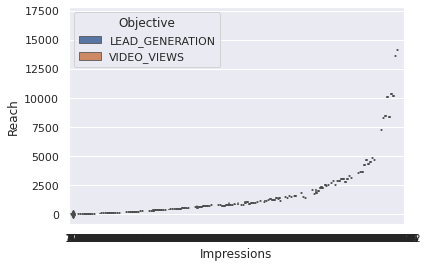

In [ ]:
sns.boxplot(x = df['Impressions'],
            y = df['Reach'],
            hue = df['Objective'])

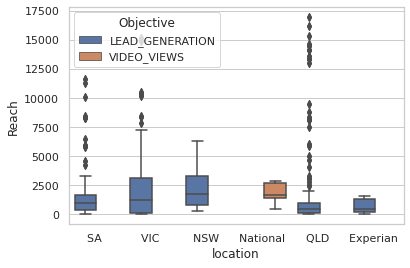

In [ ]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'location', y = 'Reach',hue = 'Objective', data = df)

Text(0.5, 1.0, 'Looksee Dataset')

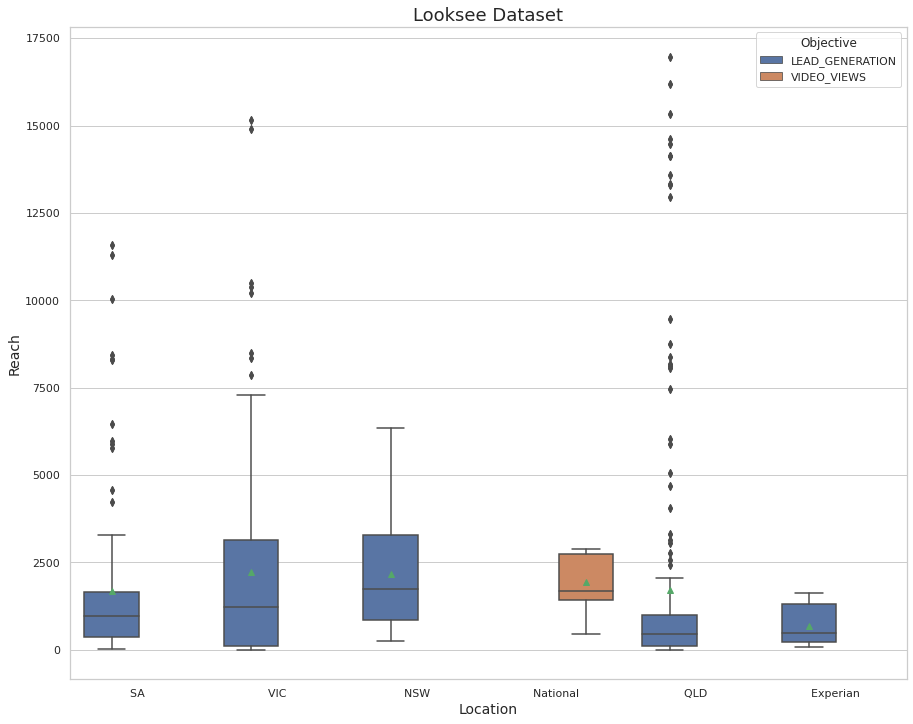

In [ ]:
# boxplot with showmeans
plt.figure(figsize=(15, 12))
sns.boxplot(x='location',
            y='Reach',
            hue = "Objective",
            data=df,
            showmeans=True)  # notice the change
plt.ylabel("Reach", size=14)
plt.xlabel("Location", size=14)
plt.title("Looksee Dataset", size=18)

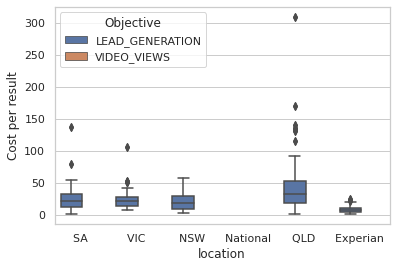

In [ ]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'location', y = 'Cost per result',hue = 'Objective', data = df)

Text(0.5, 1.0, 'Looksee Dataset')

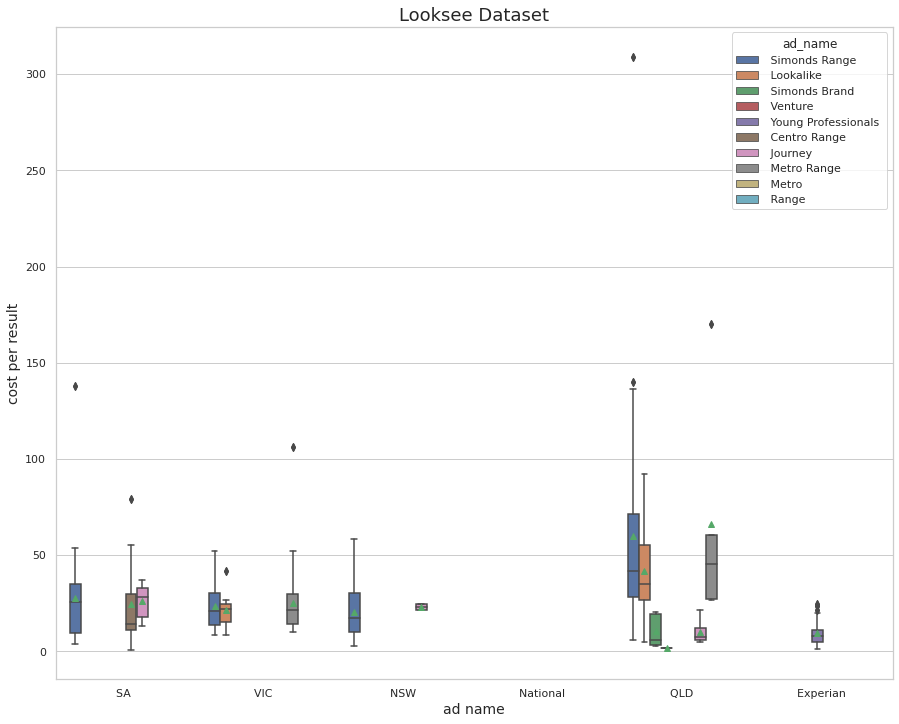

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='location',
            y='Cost per result',
            hue = "ad_name",
            data=df,
            showmeans=True)  # notice the change
plt.ylabel("cost per result", size=14)
plt.xlabel("ad name", size=14)
plt.title("Looksee Dataset", size=18)

Text(0.5, 1.0, 'Looksee Dataset')

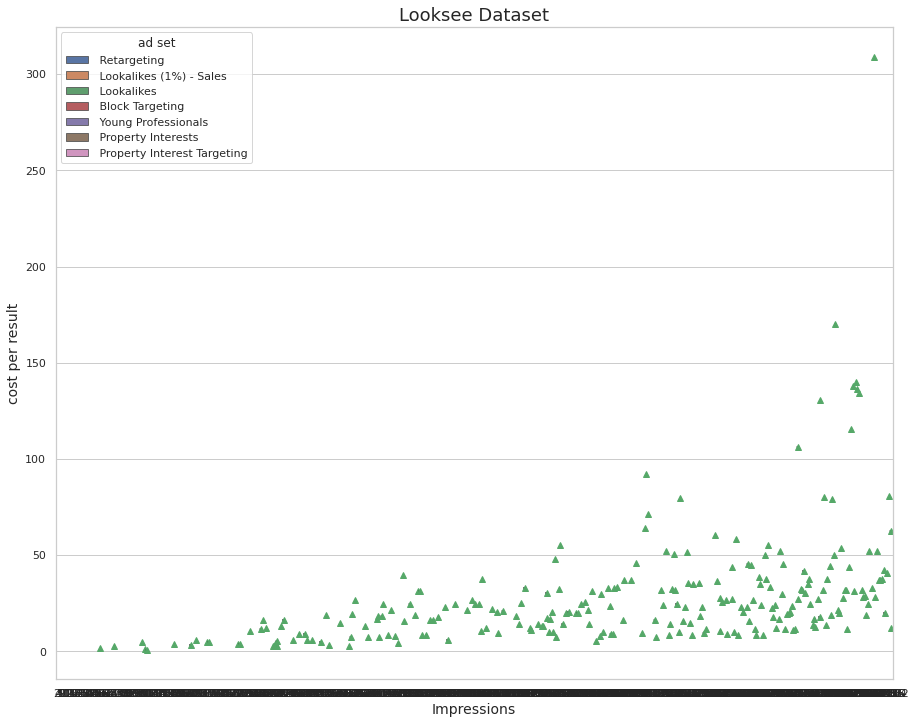

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='Impressions',
            y='Cost per result',
            hue = "ad set",
            data=df,
            showmeans=True)  # notice the change
plt.ylabel("cost per result", size=14)
plt.xlabel("Impressions", size=14)
plt.title("Looksee Dataset", size=18)

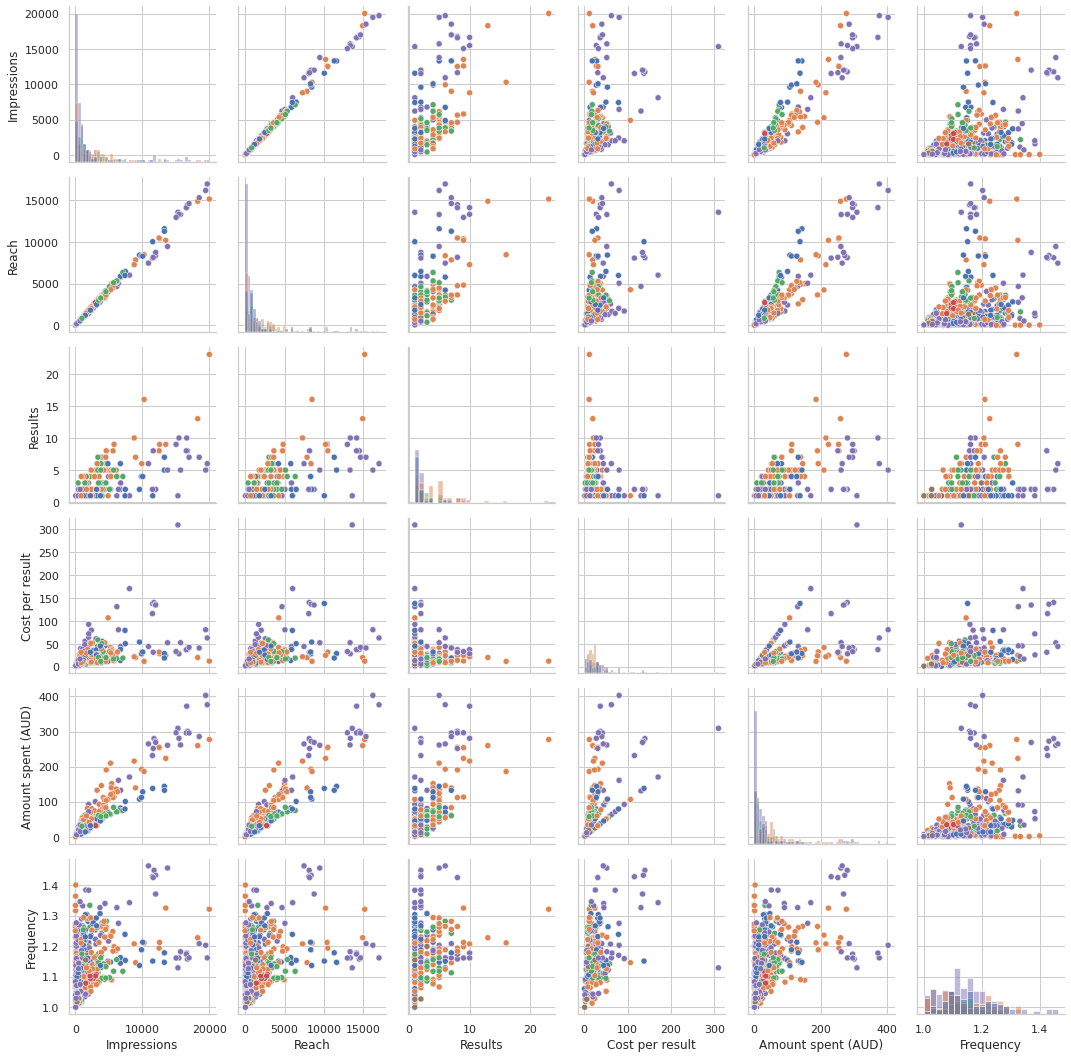

In [ ]:
g = sns.PairGrid(df,hue="location")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

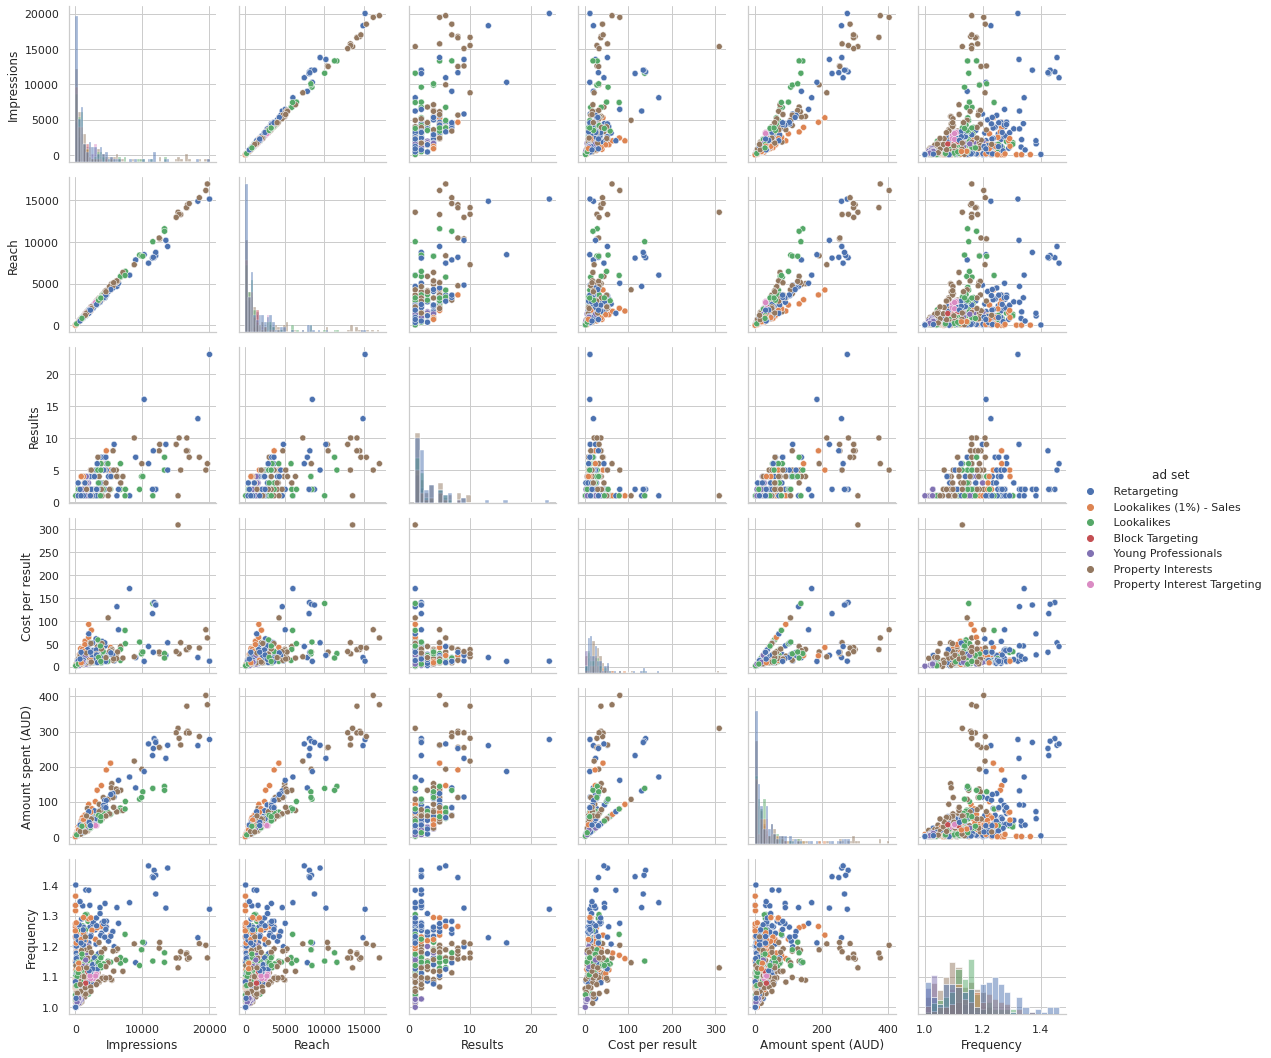

In [ ]:
g = sns.PairGrid(df, hue="ad set")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping dens

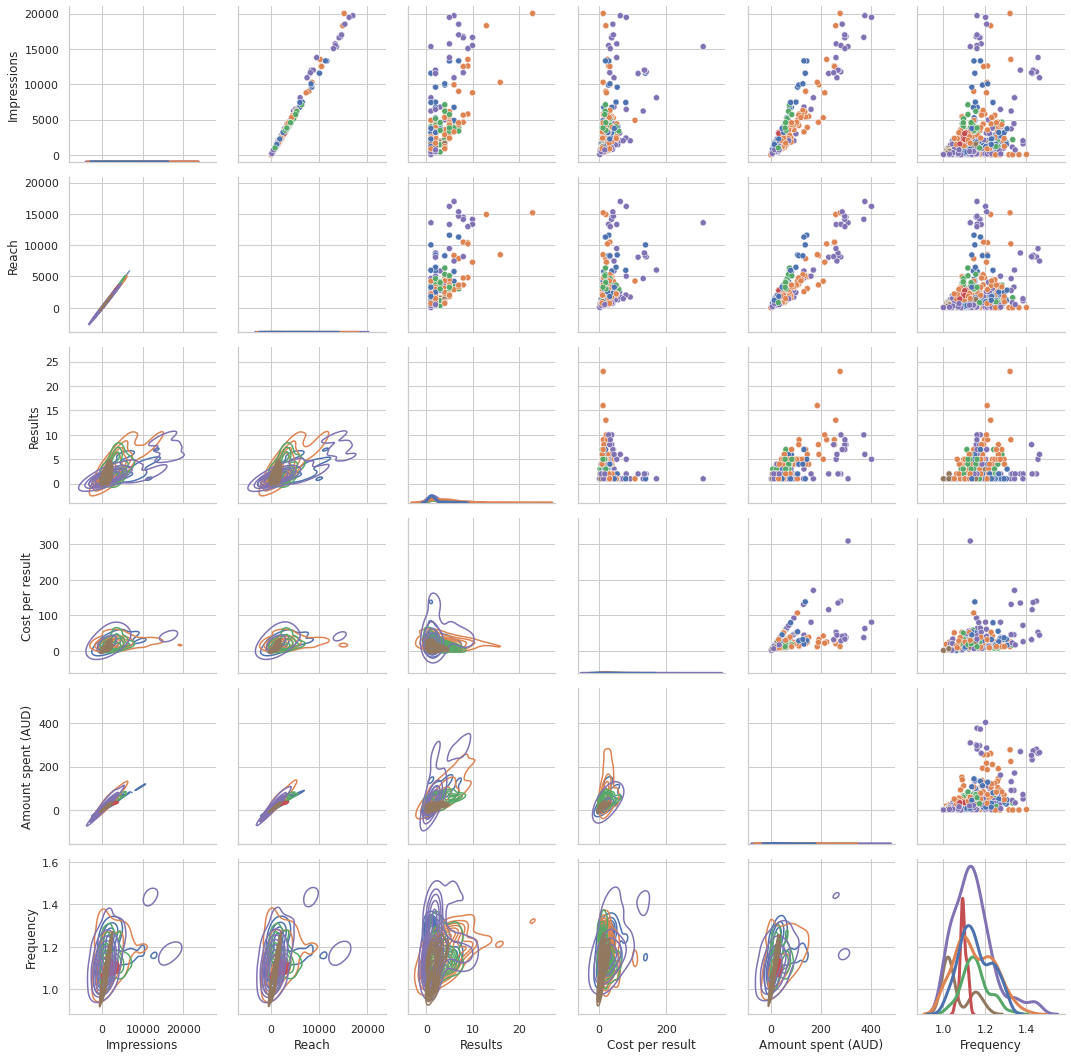

In [ ]:
g = sns.PairGrid(df,hue="location")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  

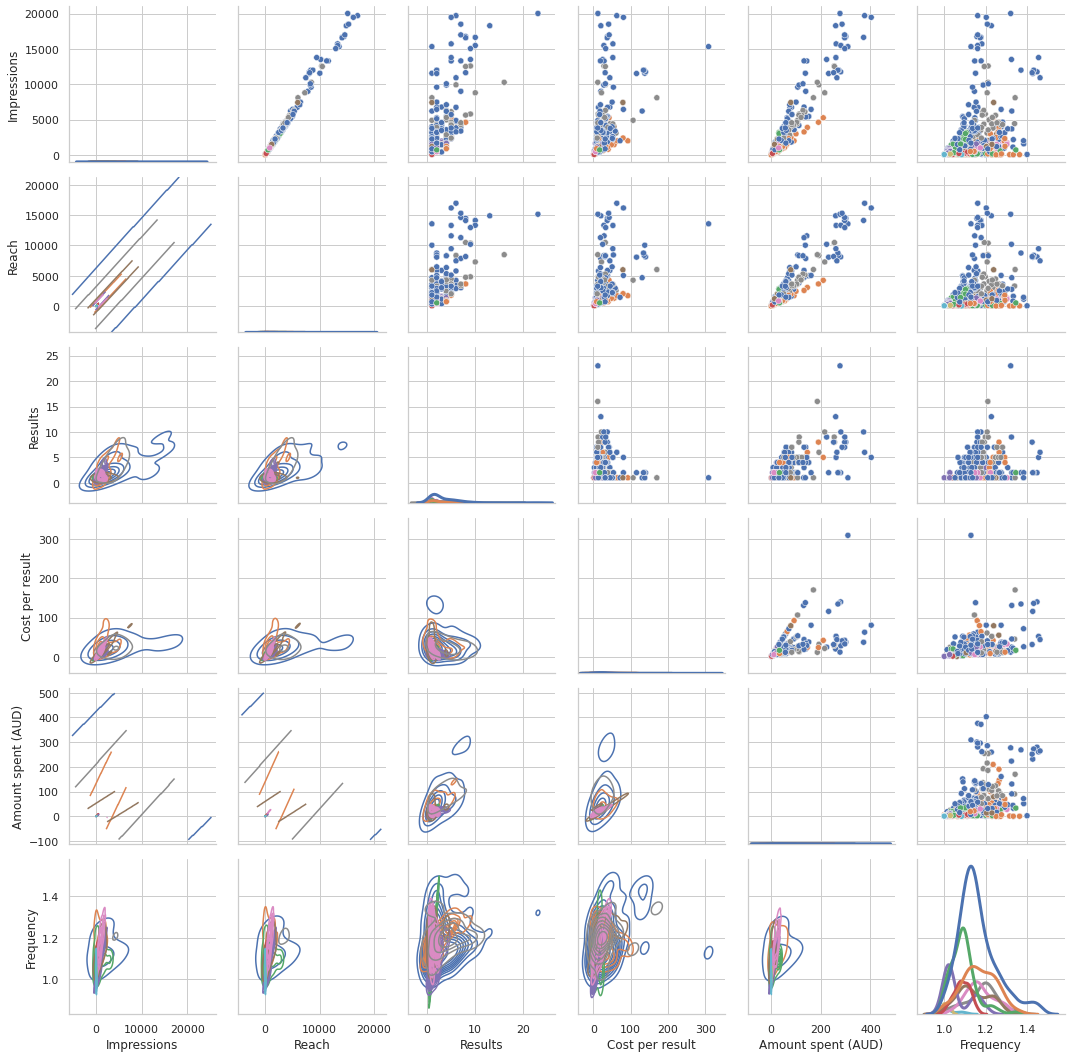

In [ ]:
g = sns.PairGrid(df,hue="ad_name")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128161 missing from current font.
  fon

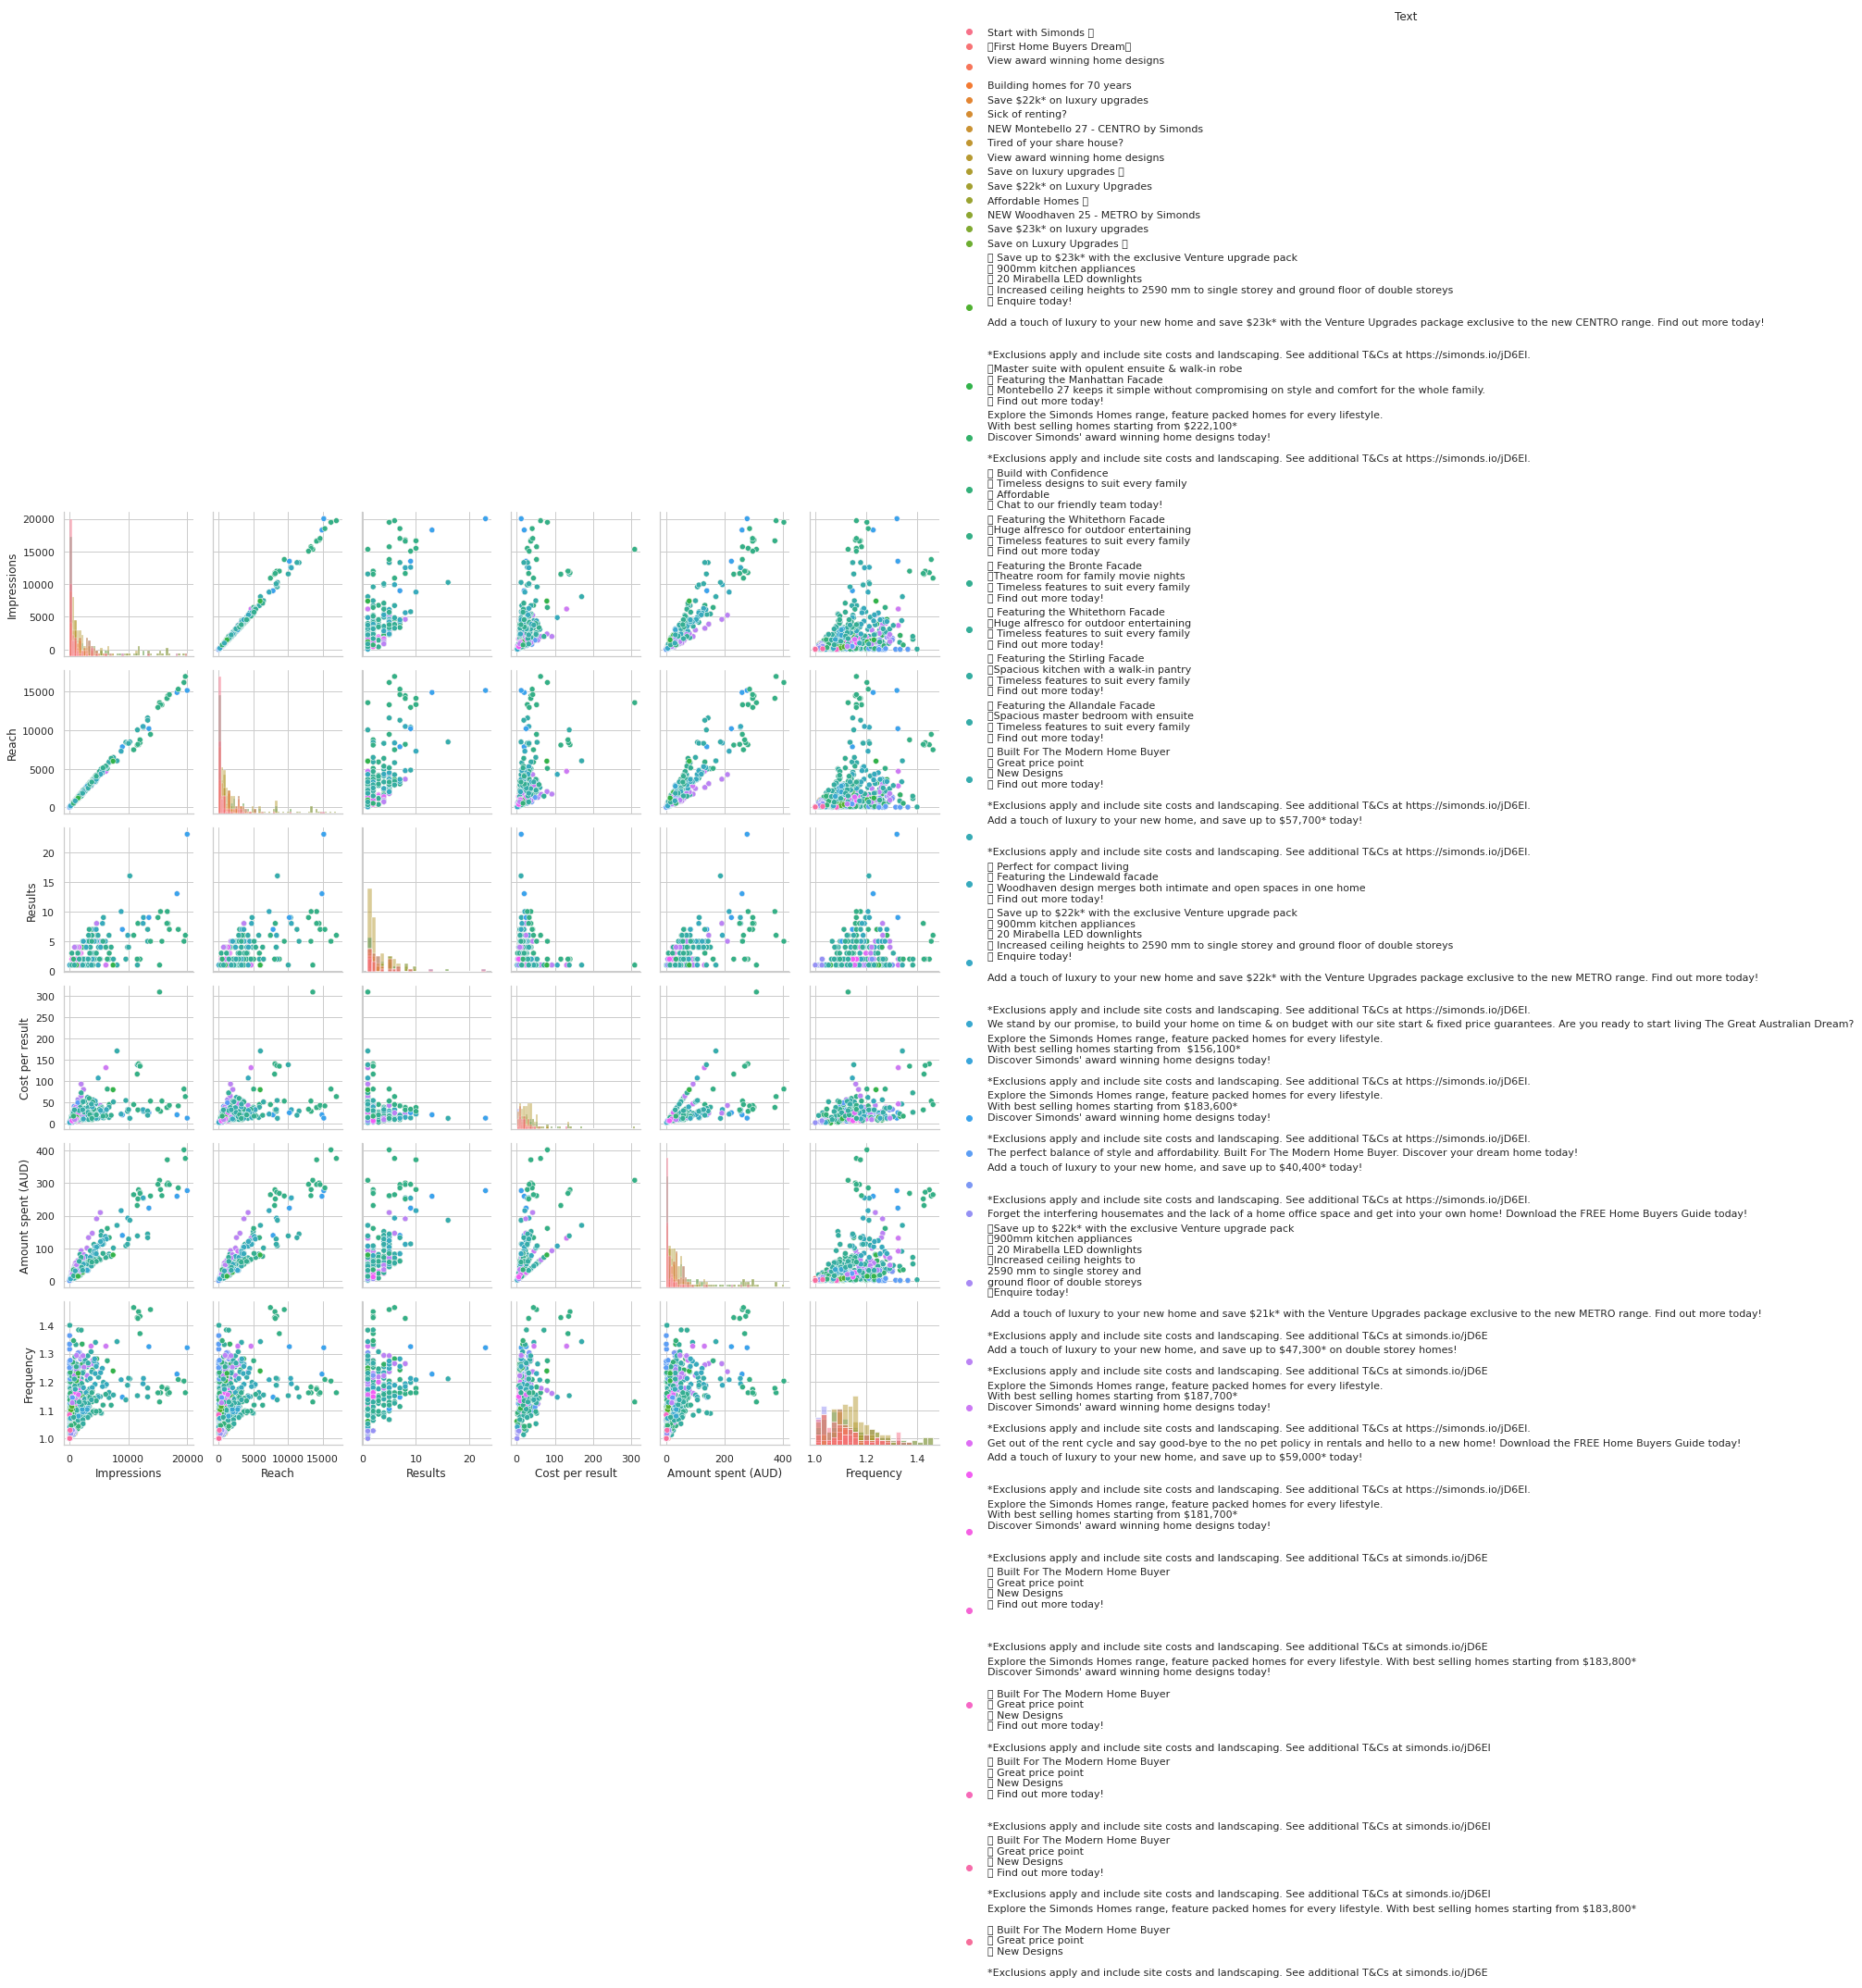

In [ ]:
g = sns.PairGrid(df, hue="Text")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()